## Vacances et bagage

Vous allez en vacances et vous avez un nombre d'objets à prendre avec vous, cepenedant, il n'y pas assez d'éspace pour tout prendre dans votre voiture.

Vous essayer donc d'assigner un nombre à chaque objet representant son importance tout en lui assignant un nombre representant l'espace qu'il va prendre dans la voiture. Déterminez les objets à inclure afin que vous ne dépassiez pas la limite d'espace dans la voiture et que la l'importance totale des objets inclues soit la plus élevée possible.

Créer une fonction ```take_objects(obj_importance, obj_sizes, car_space)``` où :
- ```obj_sizes``` de taille $n_{objets}$ represente les poids de chaque objet.
- ```obj_importance``` de taille $n_{objets}$ represente l'importance de chaque objet.
- ```car_space``` est l'espace totale disponible dans la voiture.

Essayer de trouver une solution avec une complexité de $O(n_{objets}\times size)$.


## Solution
En termes de complexite, les meilleurs algorithmes a utiliser sont :
- ```Programmation dynamique``` : Complexite de $O(n_{objets}\times size)$ : Division de probleme en tableau et resolution par partie
- ```Approche gloutonne ``` : La complexite de celle si varie et ne garantie pas une solution optimale donc on passe.

### Programmation dynamique

Matrice:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[0, 0, 4, 4, 6, 6, 6, 6, 6, 6, 6]
[0, 0, 4, 5, 6, 9, 9, 11, 11, 11, 11]
[0, 0, 8, 8, 12, 13, 14, 17, 17, 19, 19]


NameError: name 'a' is not defined

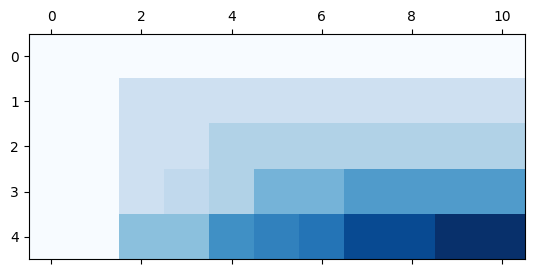

In [131]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_matrix(dp_matrix, selected_indices):
    n_objects = len(dp_matrix) - 1
    car_space = len(dp_matrix[0]) - 1

    # Create a colormap for visualization
    cmap = plt.get_cmap('Blues')

    # Plot the dynamic programming matrix as a heatmap
    fig, ax = plt.subplots()
    cax = ax.matshow(dp_matrix, cmap=cmap, vmin=0, vmax=np.max(dp_matrix))
    #fig.colorbar(cax)

    # Mark the selected positions with a different color
    for i, j in enumerate(selected_indices, start=1):
        a.add_patch(plt.Rectangle((j, n_objects - i), 1, 1, fill=True, color='red'))

    # Set axis labels
    ax.set_xticks(range(car_space + 1))
    ax.set_yticks(range(n_objects + 1))
    ax.set_xticklabels(range(car_space + 1))
    ax.set_yticklabels(range(n_objects + 1))
    ax.set_xlabel('Size (Space in Car)')
    ax.set_ylabel('Object')

    plt.title("Matrice dynamique avec objets selectionness")
    plt.show()

def take_objects(obj_importance, obj_sizes, car_space):
    n_objects = len(obj_importance)

    # Initialisation d'une matrice pour stocker les résultats intermédiaires
    dp_matrix = [[0] * (car_space + 1) for _ in range(n_objects + 1)]

    # Remplissage de la matrice en utilisant la programmation dynamique
    for i in range(1, n_objects + 1):
        for size in range(car_space + 1):
            if obj_sizes[i - 1] <= size:
                dp_matrix[i][size] = max(
                    dp_matrix[i - 1][size],
                    dp_matrix[i - 1][size - obj_sizes[i - 1]] + obj_importance[i - 1]
                )
            else:
                dp_matrix[i][size] = dp_matrix[i - 1][size]

    # Récupération des objets sélectionnés
    selected_objects = []
    indices_selected = []  # Ajout d'une liste pour stocker les indices des objets sélectionnés
    size_remaining = car_space
    for i in range(n_objects, 0, -1):
        if dp_matrix[i][size_remaining] != dp_matrix[i - 1][size_remaining]:
            indices_selected.append(i - 1)
            selected_objects.append((obj_sizes[i - 1], obj_importance[i - 1]))
            size_remaining -= obj_sizes[i - 1]

    # Affichage de la matrice
    print("Matrice:")
    for row in dp_matrix:
        print(row)

    max_size = car_space - size_remaining

    # Visualize the matrix with colored squares
    visualize_matrix(dp_matrix, indices_selected)

    return max_size, selected_objects[::-1], indices_selected[::-1]

# Exemple d'utilisation
obj_importance = [4, 2, 5, 8]
obj_sizes = [2, 2, 3, 2]
car_space = 10

result = take_objects(obj_importance, obj_sizes, car_space)
print("\nPoids maximal atteint:", result[0])
print("Objets sélectionnés (poids, importance):", result[1])
print("Indices des objets sélectionnés:", result[2])


## Sudoku
Écrivez un programme pour résoudre un puzzle de Sudoku en remplissant les cellules vides.

La solution d'un Sudoku doit satisfaire à toutes les règles suivantes :

- Chacun des chiffres 1 à 9 doit apparaître exactement une fois dans chaque ligne.
- Chacun des chiffres 1 à 9 doit apparaître exactement une fois dans chaque colonne.
- Chacun des chiffres 1 à 9 doit apparaître exactement une fois dans chacune des 9 sous-cases 3x3 de la grille.

Créer une fonction ```sudoku(puzzle)``` afficher la solution du puzzle suivant avec matplotlib (metter les cases rempli par votre algorithm dans une autre couleur) :

<img src='https://upload.wikimedia.org/wikipedia/commons/e/e0/Sudoku_Puzzle_by_L2G-20050714_standardized_layout.svg' >


Représenter le puzzle en entrée avec une table 2D de taille $9\times 9$ avec les cases vide representé par des 0.

## Solution
En termes de complexite, cet algorithme de Backtracking propose donne :
$$O(n^(n^2))$$

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np

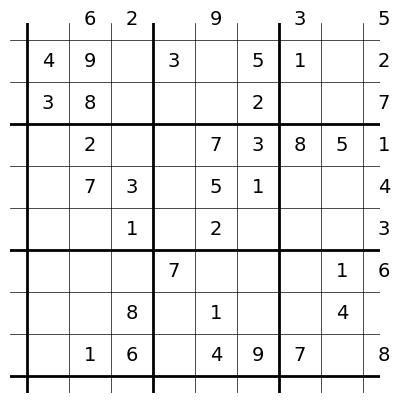

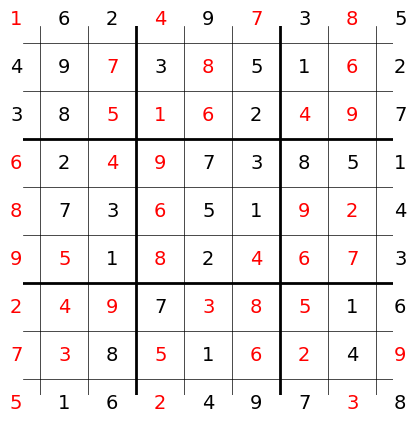

In [ ]:
import random
import matplotlib.pyplot as plt

def puzzle():
    figure, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.axis('off')
    position = [[''] * 9 for _ in range(9)]

    for i in range(9):
        lw = 2 if i % 3 == 0 else 0.5
        ax.axhline(i, color='black', lw=lw)
        ax.axvline(i, color='black', lw=lw)

    numbers = list(range(1, 10))
    random.shuffle(numbers)

    for i in range(9):
        for j in range(9):
            rand = random.randint(0, 1)
            if rand == 0:
                position[i][j] = ''
            else:
                position[i][j] = numbers[(i * 3 + i // 3 + j) % 9]

            ax.text(j + 0.5, 8 - i + 0.5, str(position[i][j]), va='center', ha='center', fontsize=14, color='black')

    plt.show()
    return position

def is_possible(puzzle, row, col, num):
    for i in range(9):
        if puzzle[row][i] == num or puzzle[i][col] == num:
            return False

    for i in range(3):
        for j in range(3):
            if puzzle[3 * (row // 3) + i][3 * (col // 3) + j] == num:
                return False

    return True

def solve_sudoku(puzzle):
    for row in range(9):
        for col in range(9):
            if puzzle[row][col] == '':
                for num in range(1, 10):
                    if is_possible(puzzle, row, col, num):
                        puzzle[row][col] = num
                        if solve_sudoku(puzzle):
                            return True
                        puzzle[row][col] = ''
                return False
    return True

def sudoku(puzzle):
    original_puzzle = [row[:] for row in puzzle]
    solve_sudoku(puzzle)
    draw_sudoku(puzzle, original_puzzle)

def draw_sudoku(puzzle, original_puzzle):
    fig, ax = plt.subplots()
    for i in range(1, 9):
        lw = 2 if i % 3 == 0 else 0.5
        ax.axhline(i, color='black', lw=lw)
        ax.axvline(i, color='black', lw=lw)

    for i in range(9):
        for j in range(9):
            cell_value, original_value = puzzle[i][j], original_puzzle[i][j]
            if cell_value != '':
                color = 'black' if original_value != '' else 'red'
                ax.text(j + 0.5, 8 - i + 0.5, str(cell_value), va='center', ha='center', fontsize=14, color=color)

    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

if __name__ == '__main__':
    sudoku(puzzle())


### Solution Optimisee
J'ai donc decide d'opter pour une methode heuristique qui est plus otptimisee vu la complexite expo de l'algo de backtracking
NB : heuristic based solution dependent largement de la taille de la population, le nombre de generations generee, le taux de mutation et le taux de selection des parents

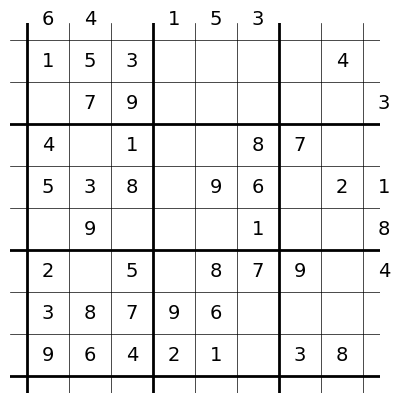

Initial Puzzle:
[['6' '4' '' '1' '5' '3' '' '' '']
 ['1' '5' '3' '' '' '' '' '4' '']
 ['' '7' '9' '' '' '' '' '' '3']
 ['4' '' '1' '' '' '8' '7' '' '']
 ['5' '3' '8' '' '9' '6' '' '2' '1']
 ['' '9' '' '' '' '1' '' '' '8']
 ['2' '' '5' '' '8' '7' '9' '' '4']
 ['3' '8' '7' '9' '6' '' '' '' '']
 ['9' '6' '4' '2' '1' '' '3' '8' '']]
Solution not found


In [ ]:
import numpy as np
import random

def is_possible(board, row, col, num):
    # Check the row
    for x in range(9):
        if board[row][x] == num:
            return False

    # Check the column
    for x in range(9):
        if board[x][col] == num:
            return False

    # Check the box
    start_row = row - row % 3
    start_col = col - col % 3
    for i in range(3):
        for j in range(3):
            if board[i + start_row][j + start_col] == num:
                return False
    return True

def generate_population(size, puzzle):
    population = []
    for _ in range(size):
        individual = np.copy(puzzle)
        for i in range(9):
            for j in range(9):
                if puzzle[i][j] == '':
                    choices = [num for num in range(1, 10) if is_possible(puzzle, i, j, num)]
                    individual[i][j] = random.choice(choices)
        population.append(individual)
    return population


def fitness(individual):
    score = 0

    # Rows and columns
    for i in range(9):
        score += len(set(individual[i]))  # Rows
        score += len(set(individual[:, i]))  # Columns

    # Boxes
    for i in range(0, 9, 3):
        for j in range(0, 9, 3):
            score += len(set(individual[i:i+3, j:j+3].flatten()))

    return score


def crossover(parent1, parent2):
    crossover_point = random.randint(1, 8)
    child = np.vstack((parent1[:crossover_point], parent2[crossover_point:]))
    return child

def mutate(individual):
    mutation_point = (random.randint(0, 8), random.randint(0, 8))
    new_value = random.randint(1, 9)
    individual[mutation_point[0]][mutation_point[1]] = new_value
    return individual

def genetic_algorithm(puzzle, population_size=1000, generations=1000):
    population = generate_population(population_size, puzzle)
    
    for generation in range(generations):
        population.sort(key=lambda x: fitness(x), reverse=True)
        if fitness(population[0]) == 81:
            print(f"Solution found in generation {generation + 1}")
            return population[0]
        
        next_generation = population[:10]  # Select top 10 individuals
        while len(next_generation) < population_size:
            parent1, parent2 = random.sample(population[:50], 2)  # Select parents from the top 50
            child = crossover(parent1, parent2)
            if random.random() < 0.1:  # 10% chance of mutation
                child = mutate(child)
            next_generation.append(child)
        
        population = next_generation

    print("Solution not found")
    return None

# Test the genetic algorithm
if __name__ == '__main__':
    initial_puzzle = puzzle()
    print("Initial Puzzle:")
    print(np.array(initial_puzzle))
    
    solution = genetic_algorithm(initial_puzzle)
    
    if solution is not None:
        print("\nSolution:")
        print(solution)


## Carrés Latins

Indicium signifie "trace" en latin. Dans ce problème, nous travaillons avec des carrés latins et des traces matricielles.

Un carré latin est une matrice carrée N par N dans laquelle chaque cellule contient l'une des N valeurs différentes, de sorte qu'aucune valeur n'est répétée dans une ligne ou une colonne. Dans ce problème, nous ne traiterons que des "carrés latins naturels" dans lesquels les N valeurs sont les entiers compris entre 1 et N.

La trace d'une matrice carrée est la somme des valeurs de la diagonale principale (qui va du coin supérieur gauche au coin inférieur droit).

Étant donné les valeurs N et K, produisez n'importe quel "carré latin naturel" N par N avec une trace K, ou dites que c'est impossible. Par exemple, voici deux réponses possibles pour N = 3, K = 6. Dans chaque cas, les valeurs qui contribuent à la trace sont soulignées.

<pre>
<ins>2</ins> 1 3            <ins>3</ins> 1 2
3 <ins>2</ins> 1            1 <ins>2</ins> 3
1 3 <ins>2</ins>            2 3 <ins>1</ins>
</pre>

Créer une fonction ```indicium(n, k)``` qui retourne une des solutions qui peuvent exister ou qui retourne ```None``` si il n'existe pas de solution.

## Solution
En termes de complexite, les meilleurs algorithmes a utiliser sont :
- ```Approche de programmation par contraintes``` : Complexite varie, mais c'est le plus efficace pour ce genre de probleme.
- ```Approche de recherche en profondeur (DFS) ``` : Algo de recherche en profondeur pour explorer toutes les possibilitees. Commence par la diag ensuite les autres en respectant les regles et s'arrete quand y a un carres qui est conforme. $O(N^N)$
- ```Approche naïve (Force brute) ``` : Toutes le permutations possibles. La plus complexe. $O(N!)$


In [ ]:
#petite func pour bien visualise
import matplotlib.pyplot as plt
def visualize_latin_square(square):
    n = len(square)
    colors = plt.cm.viridis(range(n))

    plt.figure(figsize=(5, 5))
    plt.matshow(square, cmap='viridis')

    for i in range(n):
        for j in range(n):
            plt.text(j, i, str(square[i][j]), va='center', ha='center', color='w' if square[i][j] < n // 2 else 'black')

    plt.xticks([])
    plt.yticks([])
    plt.show()

### Solution originale :
Inspo : [Jacobson Mathews Method](https://blog.paulhankin.net/latinsquares/) ; algorithme de recherche aléatoire, méthode heuristique qui utilise le hasard. Complexite du pire cas : $$O(n^3 \times \text{max\_attempts})$$

In [ ]:
import random


'''
Explication : On génère des carrés latins initiaux contenus dans une matrice d'incidence,
puis effectue une série de permutations aléatoires pour essayer de trouver un carré latin avec la trace désirée.
Si elle ne trouve pas une solution valide après un certain nombre d'essais (max_attempts) ou si satrace n'est pas respectee,
elle renvoie None.

'''

def indicium_jacob_mathews(n, k):
    def is_valid_latin(square):
        # Vérifie si le carré latin est valide
        for i in range(n):
            row = set()
            col = set()
            for j in range(n):
                if square[i][j] in row or square[j][i] in col:
                    return False
                row.add(square[i][j])
                col.add(square[j][i])
        return True


    def rand2(a, b):
      # Petite fonction de permutation pour alterner entre deux cases de notre matrice
        return (a, b) if random.randint(0, 1) == 0 else (b, a)

    def Latin(n):
      # Ces troix matrices representatent les carres latin d'une matrice d'incidence
        xy = [[0] * n for _ in range(n)]
        xz = [[0] * n for _ in range(n)]
        yz = [[0] * n for _ in range(n)]

        for i in range(n):
            for j in range(n):
                k = (i + j) % n + 1  # Adjusted to start from 1 psk en general tebdA B 0 et on init nos carres latin as suggested in the algorithm
                #chaque elet de la matrice d'incidence est init en carre latin init
                xy[i][j] = k
                xz[i][k - 1] = j
                yz[j][k - 1] = i

        mxy, mxz, myz = 0, 0, 0 # c'est les valeurs de 1 dans notre matrice d'incidence
        m = [0, 0, 0] # contient les coordonnees de -1 dans un mat imparfaite
        proper = True #si matrice parfaite ou pas
        min_iter = n * n * n

        for _ in range(min_iter) if proper else range(min_iter * 10):
            i, j, k, i2, j2, k2 = 0, 0, 0, 0, 0, 0 # choix des case pour une matrice parfaite
            i2_, j2_, k2_ = 0, 0, 0 #dans le cas d'une matrice imparfaite on a deux choix de cases donc on rajoute ces variables

            if proper: # si notre matrice est propre
                '''
                Si la matrice est parfaite (proper == True), ces lignes choisissent aléatoirement un élément de la matrice qui n’est pas égal à k.
                 Ensuite, elles trouvent un autre élément dans la matrice qui est égal à k.
                 Les coordonnées de ces deux éléments sont stockées dans les variables i, j, k, i2, j2, et k21.
                '''
                # Pick a random 1 in the array
                i, j, k = random.randint(0, n - 1), random.randint(0, n - 1), random.randint(1, n)
                while xy[i][j] == k:
                    i, j, k = random.randint(0, n - 1), random.randint(0, n - 1), random.randint(1, n)
                # on cherche i2 such that [i2, j, k] is 1. Meme chose pour for j2, k2
                i2 = yz[j][k - 1]
                j2 = xz[i][k - 1]
                k2 = xy[i][j]
                i2_, j2_, k2_ = i, j, k # dans une matrice propre on n;a pas deux choix
            else:
                '''
                Si la matrice n’est pas parfaite (proper == False), ces lignes choisissent un élément de la matrice qui est égal à -1.
                 Ensuite, elles trouvent deux autres éléments dans la matrice qui sont égaux à k.
                 Les coordonnées de ces trois éléments sont stockées dans les variables i, j, k, i2, j2, et k21.
                '''
                i, j, k = m[0], m[1], m[2] #on garde les coordonnees des -1
                # meme chose que la matrice propre, on cherche [i2, j, k] qui donne 1, same for j2, k2. (i, j, k) is -1
                #permutations aleatoires des autres cases
                i2, i2_ = rand2(yz[j][k - 1], myz)
                j2, j2_ = rand2(xz[i][k - 1], mxz)
                k2, k2_ = rand2(xy[i][j], mxy)

            proper = xy[i2][j2] == k2
            '''
            On verifie si le nouvel élément choisi rend la matrice parfaite.
            Si ce n’est pas le cas (proper == False),
            je mets à jour les coordonnées de l’élément -1 et les valeurs de la matrice1.
            '''

            if not proper:
              #on update les coords de lelt -1 et les vals de la mat
                m = [i2, j2, k2]
                mxy = xy[i2][j2]
                myz = yz[j2][k2 - 1]
                mxz = xz[i2][k2 - 1]

            ## on mets a jours nos matrices selons les valeurs alculees precedement
            xy[i][j] = k2_
            xy[i][j2] = k2
            xy[i2][j] = k2
            xy[i2][j2] = k

            yz[j][k - 1] = i2_
            yz[j][k2 - 1] = i2
            yz[j2][k - 1] = i2
            yz[j2][k2 - 1] = i

            xz[i][k - 1] = j2_
            xz[i][k2 - 1] = j2
            xz[i2][k - 1] = j2
            xz[i2][k2 - 1] = j

        return xy
    def is_latin_square(square):
        # Vérifie si le carré est un carré latin complet
        # Vérifie que chaque ligne et chaque colonne contiennent des éléments uniques de 1 à n
        for i in range(n):
            row = set(square[i])
            col = set(square[j][i] for j in range(n))
            if row != set(range(1, n + 1)) or col != set(range(1, n + 1)):
                return False
        return True

    max_attempts = 1000
    for _ in range(max_attempts):
        latin_square = Latin(n)
        trace = sum(latin_square[i][i] for i in range(n))

        if trace == k and is_latin_square(latin_square):
            return latin_square

    return None

In [ ]:
# Example usage: impossibel
N = 3
K = 7
result = indicium_jacob_mathews(N, K)
if result:
    for row in result:
        print(row)
else:
    print("No solution found.")

No solution found.


<Figure size 500x500 with 0 Axes>

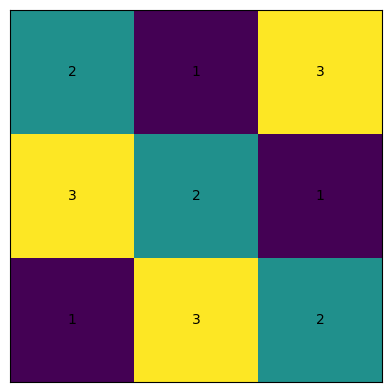

In [ ]:
# Example usage: possible
N = 3
K = 6
result = indicium_jacob_mathews(N, K)
if result:
    visualize_latin_square(result)
else:
    print("No solution found.")

### Approche de programmation par contraintes :
- from ortools.sat.python import cp_model ne marche pas.
- J'ai donc  optee pour une approche de programmation lineaire de scipy. Elle ne marche pas non plus.
- Donc DFS.

### Approche de recherche en profondeur (DFS) :

In [ ]:
def indicium_dfs(n, k):
    def dfs(depth):
        if depth == n*n:
            if sum(board[i][i] for i in range(n)) == k:
                return True
            else:
                return False

        x, y = divmod(depth, n)
        for v in range(1, n+1):
            if not row[x][v] and not col[y][v]:
                board[x][y] = v
                row[x][v] = col[y][v] = True

                if dfs(depth + 1):
                    return True

                board[x][y] = 0
                row[x][v] = col[y][v] = False

        return False

    board = [[0]*n for _ in range(n)]
    row = [[False]*(n+1) for _ in range(n)]
    col = [[False]*(n+1) for _ in range(n)]

    if dfs(0):
        return board
    else:
        return None


In [ ]:
# Tester la fonction indicium impossi
n = 4
k = 5
square = indicium_dfs(n, k)

# Vérifier si une solution a été trouvée
if square is not None:
    # Visualiser le carré latin
    visualize_latin_square(square)
else:
    print("Aucune solution trouvée.")

Aucune solution trouvée.


<Figure size 500x500 with 0 Axes>

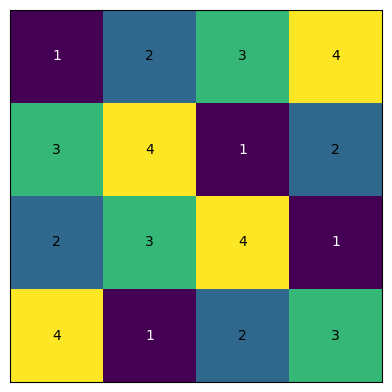

In [ ]:
# Tester la fonction indicium possible
n = 4
k = 12
square = indicium_dfs(n, k)

# Vérifier si une solution a été trouvée
if square is not None:
    # Visualiser le carré latin
    visualize_latin_square(square)
else:
    print("Aucune solution trouvée.")

### Algorithme Genetique : Il donne toujours une solution, elle n'est pas necessairement la plus optimale mais elle est acceptable. Dans notre cas il n'y a pas la notion d'optimalite donc un algorithme genetique est juste parfait.    


In [ ]:
import random

##Les etapes de lalgo genetique

### Initiaiser la population
### Definit une fonction de fitness d'evaluation
### selection
### mutation
### croisement
### Création d'une nouvelle population N+1 Répétition de chacun de ces étapes jusqu'à convergence.
# Importer la bibliothèque random

# Init population
def initialize_population(pop_size, n):
    population = []
    for i in range(pop_size):
        square = []
        #liste de listes d’entiers pour représenter un carré latin.
        for j in range(n):
            row = random.sample(range(1, n+1), n) # Générer une ligne aléatoire de 1 a N
            square.append(row)
        population.append(square)
    return population

# Fonction d'évaluation fitness func
def evaluate_population(population, n, k):
    fitness = []
    # Évaluer la population with a fitness function, on va utiliser la violation de la trace comme moyen d'augmenter la fitness et les vals repetee aussi
    for square in population:
        violations = 0 # Nombre de contraintes violées
        trace = 0 # Trace du carré
        for i in range(n):
            trace += square[i][i] # Ajouter la valeur sur la diagonale principale
            row_set = set() # Ensemble des valeurs dans la ligne i
            col_set = set() # Ensemble des valeurs dans la colonne i
            for j in range(n):
                row_set.add(square[i][j])
                col_set.add(square[j][i])
            violations += (n - len(row_set)) + (n - len(col_set)) # Compter les valeurs répétées dans la ligne et la colonne
        if trace != k: # Si la trace est différente de K, ajouter une violation
            violations += 1
        fitness.append(violations)
    return fitness

# Selection
def selection(population, fitness, pop_size):
  # Sélectionner les meilleures solutions selon la fitness (sélection par rang)
    sorted_indices = sorted(range(pop_size), key=lambda i: fitness[i]) # Trier les indices selon la fitness
    selected_indices = [i for i in sorted_indices if random.random() < (pop_size - i) / pop_size] # Liste des indices sélectionnés
    if not selected_indices: # Rang de la solution i
        selected_indices = random.sample(range(pop_size), pop_size // 2)
    selected_population = [population[i] for i in selected_indices]
    return selected_population

# Selection with probability, useful to provide diversification in cases of multiples possible solutions
def rank_based_selection(population, fitness, pop_size):
    sorted_indices = sorted(range(pop_size), key=lambda i: fitness[i])
    selected_indices = []
    for i in range(pop_size):
        rank = sorted_indices.index(i) + 1
        prob = (pop_size - rank + 1) / (pop_size * (pop_size + 1) / 2)
        if random.random() < prob:
            selected_indices.append(i)
        selected_population = [population[i] for i in selected_indices]
    return selected_population


# Mutation
def mutate(child, n, mut_rate):
    if random.random() < mut_rate:  # Appliquer la mutation avec une certaine probabilité
        i1, j1, i2, j2 = random.sample(range(n), 2) + random.sample(range(n), 2) # Choisir deux positions aléatoires dans le carré
        # Échanger les valeurs entre les positions
        child[i1][j1], child[i2][j2] = child[i2][j2], child[i1][j1]
    return child

# Croisement
def crossover(parent1, parent2, n, cross_rate):
    if random.random() < cross_rate: # Appliquer le croisement avec une certaine probabilité
        cut = random.randint(1, n-1) # Choisir un point de coupure aléatoire
        # Échanger les lignes avant le point de coupure entre les parents
        child1 = parent2[:cut] + parent1[cut:]
        child2 = parent1[:cut] + parent2[cut:]
    else:
        child1, child2 = parent1, parent2
    return child1, child2

# Remplacement avec élitisme
def replace_with_elitism(population, new_population, best_index):
    new_population[best_index] = population[best_index]
    return new_population

def indicium_genetic(n, k):
    # paramètres de l'algorithme génétique
    max_iter = 100  # Nombre maximal d'itérations
    pop_size = 100  # Taille de la population
    mut_rate = 0.1  # Taux de mutation
    cross_rate = 0.8  # Taux de croisement
    elitism = True  # Utiliser ou non l'élitisme

    # Init population aleatoirement
    population = initialize_population(pop_size, n)

    for iter in range(max_iter):
        # Évaluer la population
        fitness = evaluate_population(population, n, k)

        # Trouver la meilleure solution et sa fitness
        best_index = fitness.index(min(fitness))
        best_square = population[best_index]
        best_fitness = fitness[best_index]

        print(f"Iteration {iter + 1}:")
        print(f"Best square: {best_square}")
        print(f"Best fitness: {best_fitness}")

        if best_fitness == 0:
            print("Optimal solution found!")
            return best_square

        # Sélectionner les meilleures solutions pour la reproduction
        selected_population = rank_based_selection(population, fitness, pop_size)

        # Check if the selected population is empty
        if not selected_population:
            print("No valid Latin squares can be generated!")
            return None

        # Appliquer les opérateurs génétiques pour créer une nouvelle population
        new_population = []
        while len(new_population) < pop_size:
            parent1 = random.choice(selected_population)
            parent2 = random.choice(selected_population)
            child1, child2 = crossover(parent1, parent2, n, cross_rate)
            child1 = mutate(child1, n, mut_rate)
            child2 = mutate(child2, n, mut_rate)
            new_population += [child1, child2]

        # Remplacer la population par la nouvelle population avec élitisme si nécessaire
        if elitism:
            new_population = replace_with_elitism(population, new_population, best_index)

        population = new_population

    print("No optimal solution found!")
    return None


In [ ]:
n = 3
k = 5
square = indicium_genetic(n, k)

# Vérifier si une solution a été trouvée
if square is not None:
    # Visualiser le carré latin
    visualize_latin_square(square)
else:
    print("Aucune solution trouvée.")

Iteration 1:
Best square: [[3, 1, 2], [1, 2, 3], [2, 3, 1]]
Best fitness: 1
Iteration 2:
Best square: [[3, 1, 2], [1, 2, 3], [2, 3, 1]]
Best fitness: 1
Iteration 3:
Best square: [[3, 1, 2], [1, 2, 3], [2, 3, 1]]
Best fitness: 1
Iteration 4:
Best square: [[3, 1, 2], [1, 2, 3], [2, 3, 1]]
Best fitness: 1
Iteration 5:
Best square: [[3, 1, 2], [1, 2, 3], [2, 3, 1]]
Best fitness: 1
No valid Latin squares can be generated!
Aucune solution trouvée.


Iteration 1:
Best square: [[1, 3, 2], [3, 2, 1], [2, 1, 3]]
Best fitness: 0
Optimal solution found!


<Figure size 500x500 with 0 Axes>

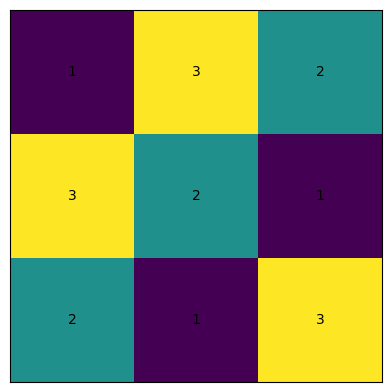

In [ ]:
# Tester la fonction indicium avec N = 3 et K = 6
n = 3
k = 6
square = indicium_genetic(n, k)

# Vérifier si une solution a été trouvée
if square is not None:
    # Visualiser le carré latin
    visualize_latin_square(square)
else:
    print("Aucune solution trouvée.")

In [ ]:

square = indicium_genetic(n=5, k=15)

# Vérifier si une solution a été trouvée
if square is not None:
    # Visualiser le carré latin
    visualize_latin_square(square)
else:
    print("Aucune solution trouvée.")

Iteration 1:
Best square: [[3, 4, 1, 5, 2], [3, 2, 5, 4, 1], [1, 3, 4, 2, 5], [5, 1, 4, 3, 2], [4, 2, 5, 1, 3]]
Best fitness: 5
No valid Latin squares can be generated!
Aucune solution trouvée.


### Comparaison des Methodes
- Ces paires sont choisies de manière à ce que k soit toujours dans l’intervalle [n, n^2], ce qui est nécessaire pour qu’un carré latin avec une trace de k existe. Notez que pour un n donné, il peut y avoir plusieurs valeurs possibles de k qui donnent un carré latin valide.



In [ ]:
#On comence par chercher les bonnes combinaisons
# List of combinations to test
combinations = [
    (2, 2), (2, 4),
    (3, 3), (3, 6), (3, 9),
    (4, 4), (4, 8), (4, 12), (4, 16),
    (5, 5), (5, 10), (5, 15), (5, 20), (5, 25),
    (6, 6), (6, 21), (6, 36),
    (7, 7), (7, 28), (7, 49),
    (8, 8), (8, 36),
]

# List to store valid combinations
valid_combinations = []

# Test each combination
for t,(n,k) in enumerate(combinations):
    print('iteration ', t )
    result = indicium_genetic(n, k)
    if result is not None:
        valid_combinations.append((n, k))

# Print the valid combinations
print("Valid combinations of (n, k):")
for n, k in valid_combinations:
    print(f"({n}, {k})")


iteration  0
Iteration 1:
Best square: [[1, 2], [2, 1]]
Best fitness: 0
Optimal solution found!
iteration  1
Iteration 1:
Best square: [[2, 1], [1, 2]]
Best fitness: 0
Optimal solution found!
iteration  2
Iteration 1:
Best square: [[3, 1, 2], [2, 3, 1], [1, 2, 3]]
Best fitness: 1
No valid Latin squares can be generated!
iteration  3
Iteration 1:
Best square: [[1, 3, 2], [3, 2, 1], [2, 1, 3]]
Best fitness: 0
Optimal solution found!
iteration  4
Iteration 1:
Best square: [[3, 1, 2], [2, 3, 1], [1, 2, 3]]
Best fitness: 0
Optimal solution found!
iteration  5
Iteration 1:
Best square: [[1, 4, 2, 3], [4, 3, 1, 2], [3, 2, 4, 1], [2, 3, 1, 4]]
Best fitness: 3
Iteration 2:
Best square: [[4, 2, 1, 3], [3, 4, 2, 1], [2, 1, 3, 4], [1, 4, 4, 2]]
Best fitness: 3
No valid Latin squares can be generated!
iteration  6
Iteration 1:
Best square: [[3, 2, 1, 4], [1, 4, 2, 3], [3, 1, 4, 2], [2, 3, 4, 1]]
Best fitness: 3
No valid Latin squares can be generated!
iteration  7
Iteration 1:
Best square: [[4, 3, 

Iteration 1:
Best square: [[1, 2], [2, 1]]
Best fitness: 0
Optimal solution found!
Iteration 1:
Best square: [[1, 2], [2, 1]]
Best fitness: 0
Optimal solution found!
Iteration 1:
Best square: [[1, 2], [2, 1]]
Best fitness: 0
Optimal solution found!
Iteration 1:
Best square: [[1, 2], [2, 1]]
Best fitness: 0
Optimal solution found!
Iteration 1:
Best square: [[1, 2], [2, 1]]
Best fitness: 0
Optimal solution found!
Iteration 1:
Best square: [[1, 2], [2, 1]]
Best fitness: 0
Optimal solution found!
Iteration 1:
Best square: [[1, 2], [2, 1]]
Best fitness: 0
Optimal solution found!
Iteration 1:
Best square: [[1, 2], [2, 1]]
Best fitness: 0
Optimal solution found!
Iteration 1:
Best square: [[1, 2], [2, 1]]
Best fitness: 0
Optimal solution found!
Iteration 1:
Best square: [[1, 2], [2, 1]]
Best fitness: 0
Optimal solution found!
Iteration 1:
Best square: [[2, 1], [1, 2]]
Best fitness: 0
Optimal solution found!
Iteration 1:
Best square: [[2, 1], [1, 2]]
Best fitness: 0
Optimal solution found!
Iter

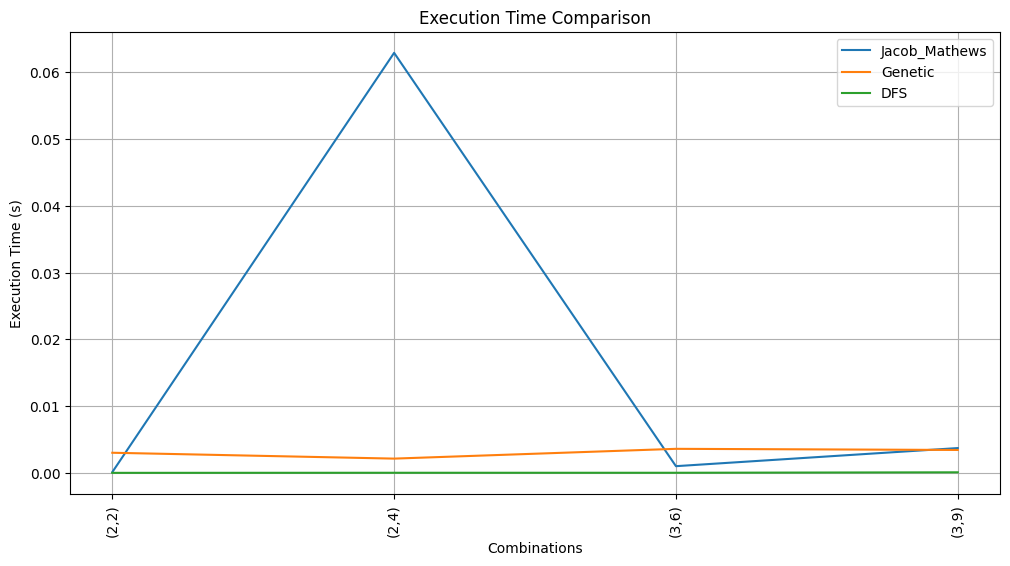

Average execution time for Jacob_Mathews: 0.0169 seconds
Average execution time for Genetic: 0.0031 seconds
Average execution time for DFS: 0.0000 seconds
The best function is DFS


In [ ]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np


# List of combinations of n,k
combinations = valid_combinations

# Stocker execution times
execution_times = {
    "Jacob_Mathews": [],
    "Genetic": [],
    "DFS": []
}

# get an average execution time en bouclant 10 fois
num_repeats = 10

for n, k in combinations:
    jacob_mathews_times = []
    genetic_times = []
    dfs_times = []

    for _ in range(num_repeats):
        start_time = time.time()
        indicium_jacob_mathews(n, k)
        jacob_mathews_times.append(time.time() - start_time)

        start_time = time.time()
        indicium_genetic(n, k)
        genetic_times.append(time.time() - start_time)

        start_time = time.time()
        indicium_dfs(n, k)
        dfs_times.append(time.time() - start_time)

    execution_times["Jacob_Mathews"].append(np.mean(jacob_mathews_times))
    execution_times["Genetic"].append(np.mean(genetic_times))
    execution_times["DFS"].append(np.mean(dfs_times))

# Plot res
plt.figure(figsize=(12, 6))
for function, times in execution_times.items():
    plt.plot(range(len(combinations)), times, label=function)

plt.xticks(range(len(combinations)), [f"({n},{k})" for n, k in combinations], rotation=90)
plt.xlabel("Combinations")
plt.ylabel("Execution Time (s)")
plt.legend()
plt.title("Execution Time Comparison")
plt.grid(True)
plt.show()

#  average execution time for each function
for function, times in execution_times.items():
    average_time = np.mean(times)
    print(f"Average execution time for {function}: {average_time:.4f} seconds")

#  lowest average execution time --> best func
best_function = min(execution_times, key=lambda k: np.mean(execution_times[k]))
print(f"The best function is {best_function}")


# Machine Learning Part

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_blobs
import matplotlib.pyplot as plt


datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 20), random_state=0)
]

In [ ]:
datasets[0]

(array([[ 0.03159499,  0.98698776],
        [ 2.11509784, -0.04624397],
        [ 0.88248972, -0.07575606],
        [-0.0551441 , -0.03733246],
        [ 0.82954503, -0.53932149],
        [ 2.11285708,  0.66208353],
        [ 0.5696927 ,  0.33744136],
        [ 0.95217454, -0.75307471],
        [-0.02922115,  0.39287336],
        [ 1.71579557,  0.36069454],
        [-0.27883014,  0.61420539],
        [ 2.00344509, -0.3091496 ],
        [ 1.50009616, -0.74636376],
        [ 1.22540835,  1.19793017],
        [ 0.46730819,  0.54703192],
        [-0.36653222,  1.11971633],
        [ 0.30124459,  1.23315697],
        [ 0.30430746,  0.82373935],
        [-0.23712492,  0.77876034],
        [ 1.16339832,  0.55290238],
        [-0.59702417,  0.6572361 ],
        [ 0.46356735, -0.1951543 ],
        [ 0.68451111,  0.75287685],
        [ 0.70515699, -0.45892444],
        [-0.65805008, -0.12944211],
        [-0.74662946, -0.3829632 ],
        [ 0.60585226,  0.31252842],
        [ 2.18137168, -0.022

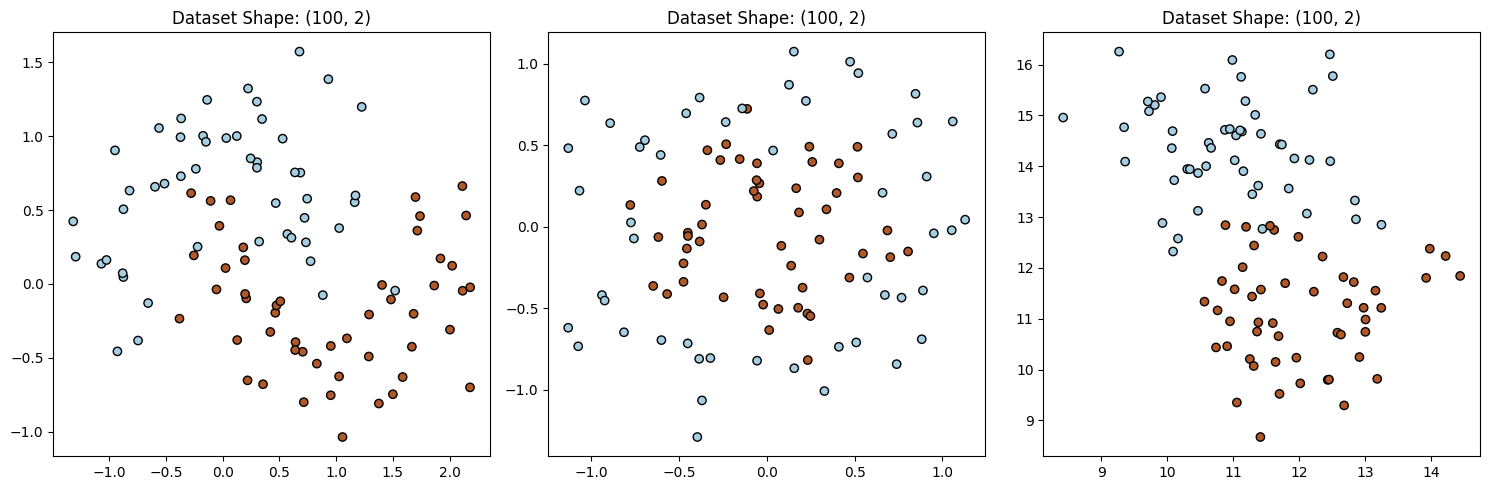

In [ ]:
# On va visualiser dabord
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot each dataset
for ax, (X, y) in zip(axes, datasets):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    ax.set_title(f'Dataset Shape: {X.shape}')

plt.tight_layout()
plt.show()

## NumPy: Régression Logistique

On va construire sur ce qu'on avait fait en cours avec la régression linéaire et essayer de créer un modèle linéaire pour la classification. Étant donné un ensemble de variables explicatives $\mathbf{X} \in \mathbb{R}^{n \times d}$ et une variable expliquée $\mathbf{y} \in \{0,1\}^{n}$ qui représente la classe d'appartenance de chaque point. Notre objectif est de trouver $\beta$ qui minimise l'erreur de prédiction:

$L(\beta) = - \sum_i y_i \log(\sigma(\mathbf{x}_i \beta)) + (1-y_i) \log(1-\sigma(\mathbf{x}_i \beta))$ (Cross-Entropy Loss)

où $\sigma$ représente la fonction sigmoïde ou la fonction logistique :

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

On appelle le modèle qui découle de cette formulation la régression logistique. C'est une technique de modélisation pour prédire des résultats binaires (Oui/Non) en utilisant des coefficients pour expliquer la relation entre les variables explicatives et le résultat.

Créez une classe ```LogisticRegression``` qui contient (entre autres) les méthodes :
- ```fit(X, y)```: calcule les paramètres du modèle selon les données
- ```predict(X)```: crée les prédictions pour $X$.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class LogisticRegression:
    def __init__(self, X, y, optimizer='gradient_descent', learning_rate=0.01, n_iterations=1000):
        self.X = self.add_intercept(X)
        self.beta = np.zeros(X.shape[1])
        self.y = y
        self.optimizer = optimizer
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))


    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def gradient_descent(self, X, y):
        '''
        λ  = valeur singulière la plus grande de  X
        α=4λ2
        t = 0
        Tant que  t<niterations :
        ∇L=XT(σ(Xβ)−y)
        β=β−α∇L
        t=t+1
        '''
        lambda_val = np.max(X)
        alpha = 4 * lambda_val ** 2
        t = 0

        while t < self.n_iterations:
            z = np.dot(X, self.beta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, h - y)
            self.beta -= alpha * gradient
            t += 1

    def newton_method(self, X, y):
        '''
        t=0
        Tant que  t<niterations :
        H=∇2L=XTdiag(σ(Xβ)1−σ(Xβ))X
        β=β−H−1.∇L
        t=t+1
        '''
        t = 0

        while t < self.n_iterations:
            z = np.dot(X, self.beta)
            h = self.sigmoid(z)
            diag_matrix = np.diag(h * (1 - h))
            hessian = np.dot(np.dot(X.T, diag_matrix), X)
            gradient = np.dot(X.T, h - y) #deltaL
            self.beta -= np.dot(np.linalg.inv(hessian), gradient)
            t += 1

    def fit(self, X, y):
        if self.optimizer == 'gradient_descent':
            self.gradient_descent(X, y)
        elif self.optimizer == 'newton_method':
            self.newton_method(X, y)
        else:
            raise ValueError("Invalid optimizer. Supported optimizers are 'gradient_descent' and 'newton_method'.")

    def predict(self, X):
        z = np.dot(X, self.beta)
        predictions = self.sigmoid(z)
        return np.round(predictions)


    def plot_decision_boundary(self, X, y):
        h = 0.02  # step size in the mesh
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
        cmap_points = ListedColormap(['#FF0000', '#0000FF'])

        plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_points, edgecolors='k', s=30)
        plt.title("Decision Boundary and Points")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()

In [ ]:
def test(optimizer='gradient_descent'):


    fig, axs = plt.subplots(1, len(datasets), figsize=(15, 5))

    for i, (dataset, ax) in enumerate(zip(datasets, axs)):
        X, y = dataset  # ignoring the intercept for a 2D plot
        model = LogisticRegression(X,y,optimizer=optimizer, learning_rate=0.01, n_iterations=1000)

        model.fit(X, y)

        # Decision boundary with min and max
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01)) #generer des vals pour test
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot decision boundary and scatter plot
        ax.contourf(xx, yy, Z, alpha=0.8)
        ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, linewidth=1)

        ax.set_title('Decision Boundary - Dataset {}'.format(i + 1))
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')

    plt.show()


## Optimisation par descente de gradient

Comme pour la régression linéaire il faut rajouter une colonne de 1 à X. L'algorithme de descente de gradient est le suivant :

- $\lambda$ = valeur singulière la plus grande de $X$
- $\alpha = \frac{4}{\lambda^2}$
- t = 0
- Tant que $t < n_{\text{iterations}}$:
  - $\nabla L= X^T(\sigma(X\beta)-y)$
  - $\beta = \beta - \alpha\nabla L$
  - $t=t+1$


<ipython-input-14-dfdfd0330f58>:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


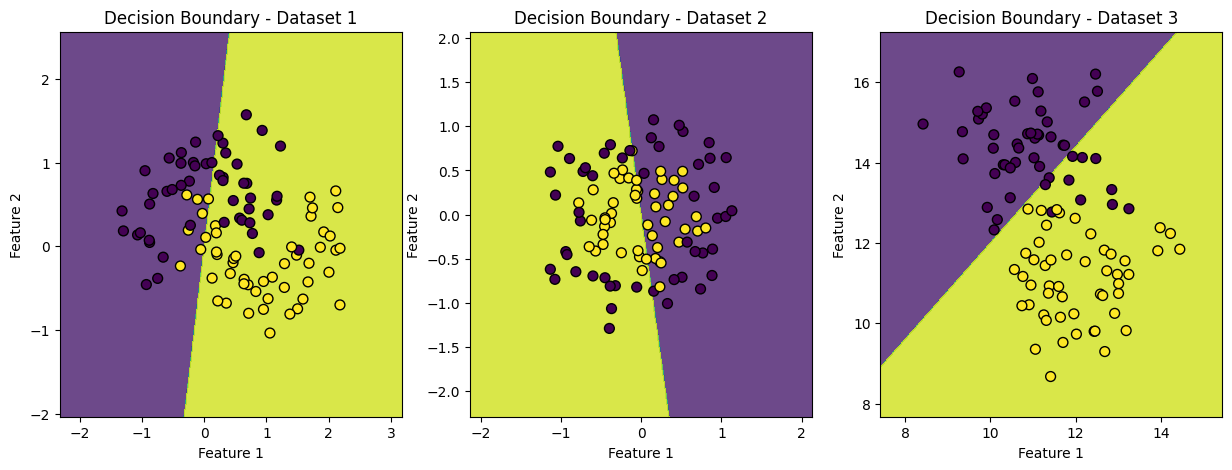

In [ ]:
test(optimizer ='gradient_descent')

## Optimisation par la méthode Newton
Une méthode qui a une vitesse de convergence plus grande que celle de la descente de gradient est celle de Newton. Son pseudo code est le suivant :
- $t = 0$
- Tant que $t < n_{\text{iterations}}$:
  - $H = \nabla^2 L= X^T\text{diag}\left(\frac{\sigma(X\beta)}{1-\sigma(X\beta)}\right)X$
  - $\beta = \beta - H^{-1} . \nabla L$
  - $t=t+1$

Ajouter un paramètre ```optimizer``` au constructeur qui permet de choisir la méthode d'optimisation. La méthode par défaut est supposé être la descente de gradient.

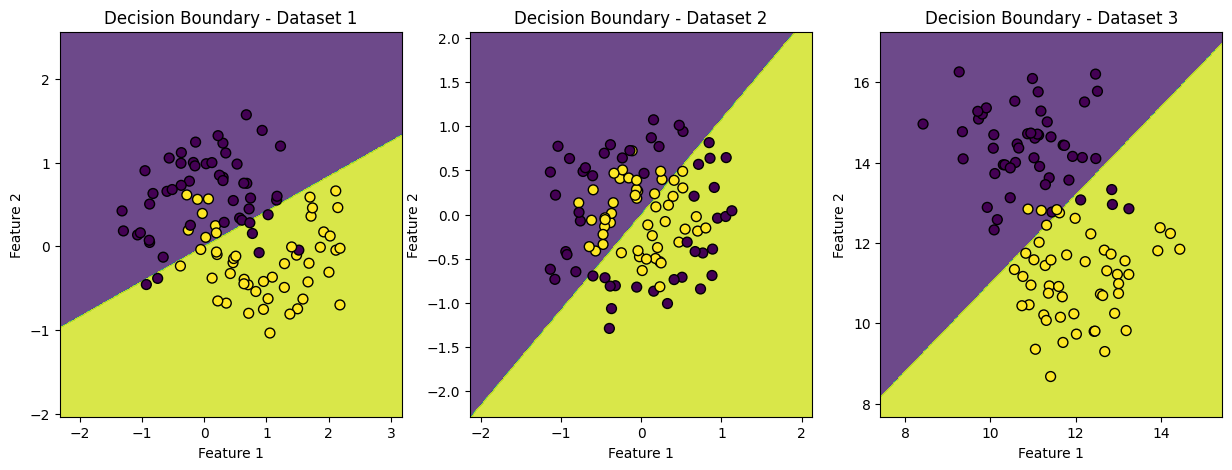

In [ ]:
test(optimizer ='newton_method')

## Comparaison de la vitesse de convergence

Sur les trois datasets, afficher l'évolution de la fonction objectif des deux méthodes en fonction de l'itération (sur le même plot pour chaque dataset).

<ipython-input-14-dfdfd0330f58>:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


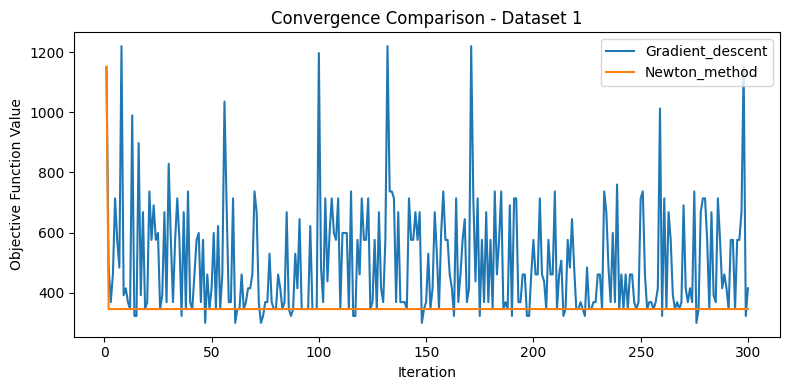

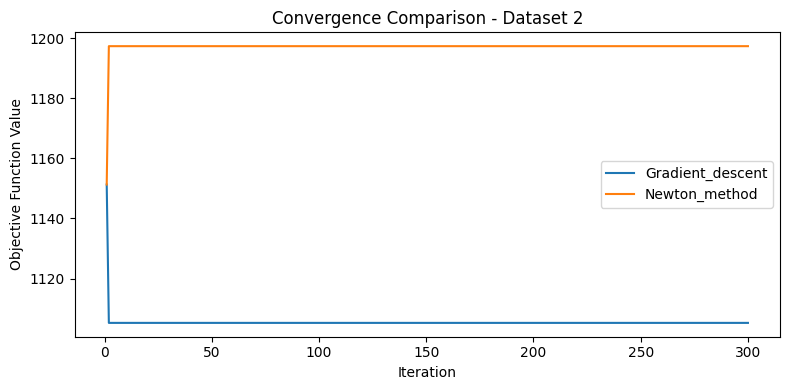

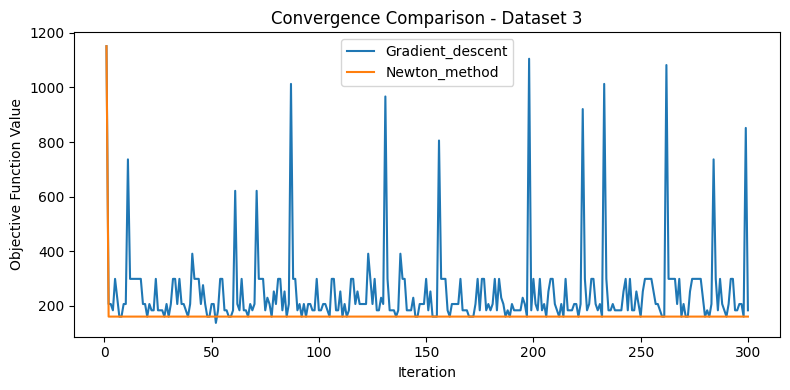

In [ ]:
def compare_convergence(optimizer1='gradient_descent', optimizer2='newton_method'):
    epsilon = 1e-10

    for i, dataset in enumerate(datasets):
        X, y = dataset

        model1 = LogisticRegression(X, y, optimizer=optimizer1, learning_rate=0.01, n_iterations=300)
        model2 = LogisticRegression(X, y, optimizer=optimizer2, learning_rate=0.01, n_iterations=300)

        # Fit the models and record the objective function values
        objective_values1, objective_values2 = [], []
        for _ in range(model1.n_iterations):
            h1 = model1.predict(X)
            # Apply numerical stabilization to the objective function
            objective1 = - np.sum(y * np.log(h1 + epsilon) + (1 - y) * np.log(1 - h1 + epsilon))
            objective_values1.append(objective1)
            model1.gradient_descent(X, y)

            h2 = model2.predict(X)
            # Apply numerical stabilization to the objective function
            ## cross entropy use
            objective2 = - np.sum(y * np.log(h2 + epsilon) + (1 - y) * np.log(1 - h2 + epsilon)) #L(β)=∑iyilog(σ(xiβ))+(1−yi)log(1−σ(xiβ)) ne marche pas, div par zero
            objective_values2.append(objective2)
            model2.newton_method(X, y)

        # Plot the convergence curves for each optimizer in one figure
        plt.figure(figsize=(8, 4))

        plt.plot(range(1, model1.n_iterations + 1), objective_values1, label=optimizer1.capitalize())
        plt.plot(range(1, model2.n_iterations + 1), objective_values2, label=optimizer2.capitalize())

        plt.title(f'Convergence Comparison - Dataset {i + 1}')
        plt.xlabel('Iteration')
        plt.ylabel('Objective Function Value')
        plt.legend()

        plt.tight_layout()
        plt.show()

# Compare convergence for both optimizers on each dataset
compare_convergence(optimizer1='gradient_descent', optimizer2='newton_method')


## Arbres de Décision

L'algorithme des arbres de décision est une méthode d'apprentissage automatique largement utilisée pour la classification et la régression. Le principe de l'algorithme des arbres de décision repose sur la création d'une structure arborescente qui permet de prendre des décisions basées sur des caractéristiques (variables) des données. Voici comment fonctionne cet algorithme pour la classification :

1. **Sélection de la caractéristique de division :** L'algorithme commence par sélectionner la caractéristique (variable) qui, lorsqu'elle est utilisée pour diviser les données, maximise la séparation entre les différentes classes de sortie. L'objectif est de trouver la caractéristique qui rend les sous-ensembles de données résultants aussi homogènes que possible en termes de classe. Les methodes Utilisees pour l selection sont soit gini soit entropy

2. **Division des données :** Une fois la caractéristique de division sélectionnée, les données d'entraînement sont divisées en sous-ensembles en fonction des valeurs possibles de cette caractéristique. Par exemple, si la caractéristique est la "couleur", les données peuvent être divisées en sous-ensembles pour chaque couleur (rouge, vert, bleu, etc.).

3. **Répétition :** Les étapes 1 et 2 sont répétées pour chaque sous-ensemble résultant. L'algorithme cherche à diviser chaque sous-ensemble en utilisant la caractéristique qui maximise la séparation des classes.

4. **Arrêt :** L'algorithme s'arrête lorsqu'une condition d'arrêt est satisfaite. Cela peut être lorsque tous les sous-ensembles sont suffisamment homogènes (par exemple, tous les exemples dans un sous-ensemble appartiennent à la même classe).

5. **Attribution de classe :** Une fois que l'arbre de décision est construit, il peut être utilisé pour attribuer une classe ou une étiquette à de nouvelles données en suivant les règles de classification définies par l'arbre. Les données sont acheminées le long des branches de l'arbre en fonction de leurs caractéristiques jusqu'à ce qu'une feuille de l'arbre soit atteinte, ce qui correspond à la classe attribuée.


Créer une classe DecisionTree qui contient entre autres :
 - Un constructeur ```DecisionTree(criterion)``` où ```criterion``` est le critère d'impurité utilisé dans l'arbre. Il peut soit être l'entropy ou l'impurité gini.
 - la méthode ```fit(X, y)``` qui crée l'arbre de decision.
 - la méthode ```predict(X)``` qui retourne le classe de chaque observation dans $X$.

<img src='https://drive.google.com/uc?export=view&id=1Y_0ItBEU1nGLer7uQndGRmOiSCQfenTZ'/>

Ici pour ```criterion="gini"``` nous avons :
$$H(Q)=1-\sum_{i=0}^{k-1} \left(\frac{n_i}{n}\right)^2$$
où $n_i$ est le nombre de points dans la classe $i$ qui se trouve dans $Q$ et $k$ est le nombre de classes. Et pour ```criterion="entropy"``` nous avons :
$$H(Q)=-\sum_{i=0}^{k-1} \frac{n_i}{n}\log_2 \frac{n_i}{n}$$

In [ ]:
import pandas as pd
class DecisionTree:
    def __init__(self, criterion="gini"):
        if criterion not in ["gini", "entropy"]:
            raise ValueError("Criterion must be 'gini' or 'entropy'")
        self.criterion = criterion
        self.tree = None

    def _impurity(self, y):
        num_samples = len(y)
        if self.criterion == "gini":
            unique_classes = pd.Series(y).value_counts()
            impurity = 1 - sum((n / num_samples) ** 2 for n in unique_classes)
        elif self.criterion == "entropy":
            unique_classes = pd.Series(y).value_counts()
            impurity = -sum((n / num_samples) * (np.log2(n / num_samples)) for n in unique_classes)
        return impurity

    def fit(self, X, y):
        self.tree = self._fit(X, y)

    def _fit(self, X, y):
        if len(pd.Series(y).unique()) == 1:
            return pd.Series(y).iloc[0]
        if len(X.columns) == 0:
            return pd.Series(y).value_counts().idxmax()
        best_split, best_impurity = None, float('inf')
        for feature in X.columns:
            unique_values = X[feature].unique()
            for value in unique_values:
                left_mask = X[feature] <= value
                right_mask = X[feature] > value
                left_impurity = self._impurity(y[left_mask])
                right_impurity = self._impurity(y[right_mask])
                weighted_impurity = (left_impurity * len(y[left_mask]) + right_impurity * len(y[right_mask])) / len(y)
                if weighted_impurity < best_impurity:
                    best_split, best_impurity = (feature, value), weighted_impurity
        if best_split is None:
            return pd.Series(y).value_counts().idxmax()
        feature, value = best_split
        left_mask = X[feature] <= value
        right_mask = X[feature] > value
        left_tree = self._fit(X[left_mask], y[left_mask])
        right_tree = self._fit(X[right_mask], y[right_mask])
        return (feature, value, left_tree, right_tree)

    def predict(self, X):
        return X.apply(lambda row: self._predict(row, self.tree), axis=1)

    def _predict(self, row, tree):
        if not isinstance(tree, tuple):
            return tree
        feature, value, left_tree, right_tree = tree
        if row[feature] <= value:
            return self._predict(row, left_tree)
        else:
            return self._predict(row, right_tree)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


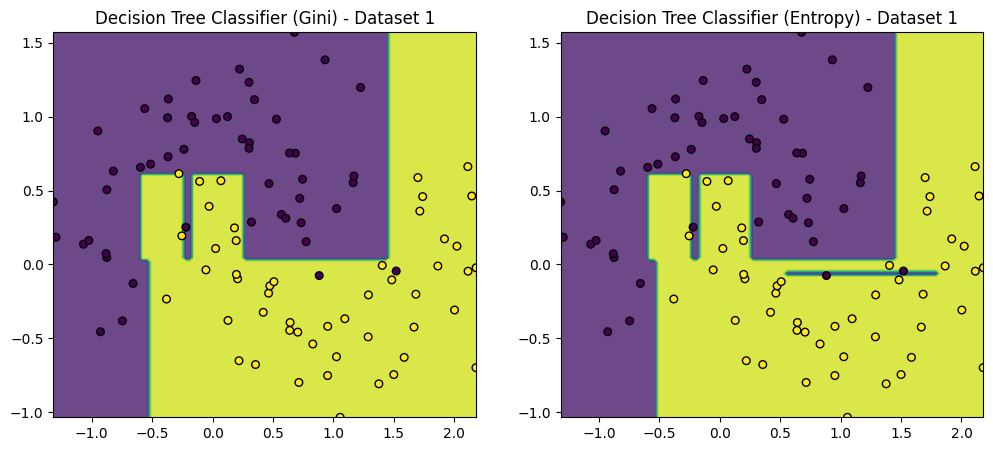

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


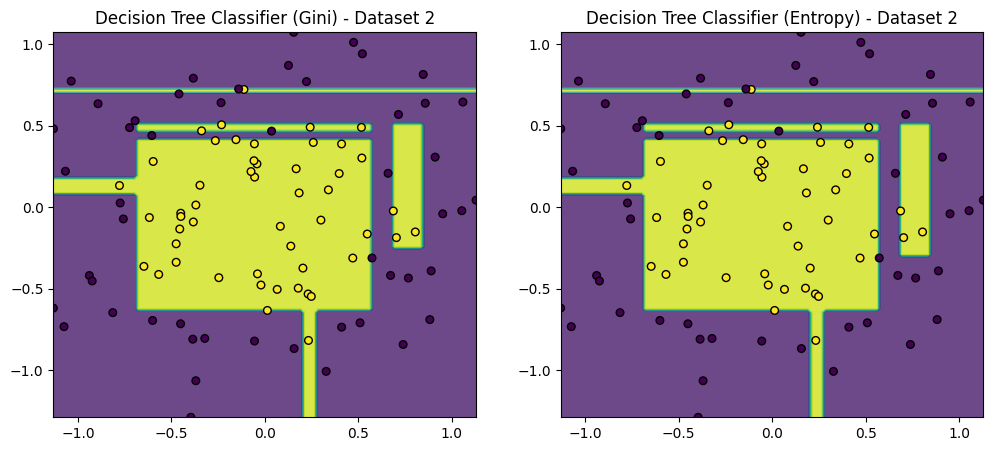

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


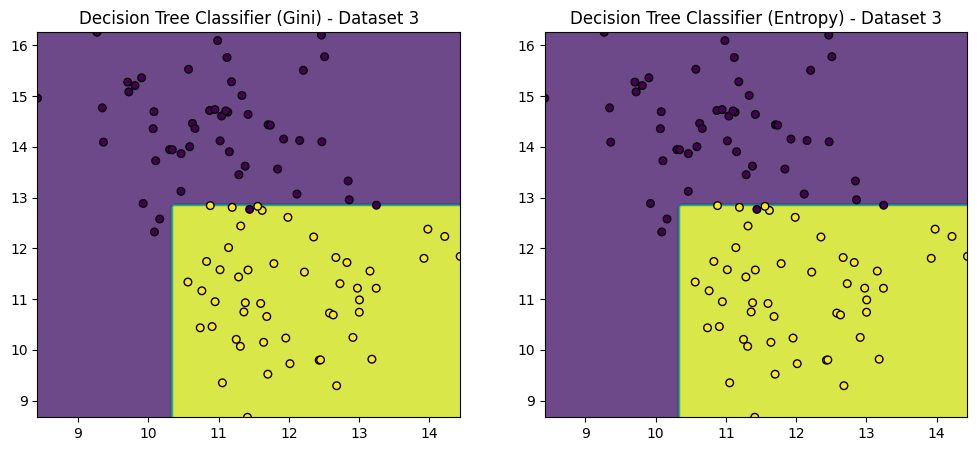

In [ ]:
import pandas as pd
from sklearn.datasets import make_moons, make_circles, make_blobs
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Create datasets
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 20), random_state=0)
]

# Fit and visualize the decision boundaries
for idx, dataset in enumerate(datasets):
    X, y = dataset
    X = pd.DataFrame(X, columns=['feature1', 'feature2'])
    y = pd.Series(y)

    # Decision Tree with Gini criterion
    clf_gini = DecisionTreeClassifier(criterion="gini")
    clf_gini.fit(X, y)
    y_pred_gini = clf_gini.predict(X)

    # Decision Tree with Entropy criterion
    clf_entropy = DecisionTreeClassifier(criterion="entropy")
    clf_entropy.fit(X, y)
    y_pred_entropy = clf_entropy.predict(X)

    # Plot decision boundaries and color points based on predictions
    plt.figure(figsize=(12, 5))

    # Plot Decision Tree (Gini)
    plt.subplot(1, 2, 1)
    plt.title(f'Decision Tree Classifier (Gini) - Dataset {idx + 1}')
    xx, yy = np.meshgrid(np.linspace(X['feature1'].min(), X['feature1'].max(), 100),
                         np.linspace(X['feature2'].min(), X['feature2'].max(), 100))
    Z = clf_gini.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    plt.scatter(X['feature1'], X['feature2'], c=y, cmap='viridis', edgecolor='k', s=30)

    # Plot Decision Tree (Entropy)
    plt.subplot(1, 2, 2)
    plt.title(f'Decision Tree Classifier (Entropy) - Dataset {idx + 1}')
    Z = clf_entropy.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    plt.scatter(X['feature1'], X['feature2'], c=y, cmap='viridis', edgecolor='k', s=30)

    plt.show()


## Forêt Aléatoire

Le principe du Random Forest (forêt aléatoire en français) est une technique d'apprentissage automatique largement utilisée pour la classification, la régression et d'autres tâches liées à la prédiction. Il appartient à la catégorie des méthodes d'ensemble, qui consistent à combiner les prédictions de plusieurs modèles pour obtenir une prédiction plus robuste et précise. Voici comment fonctionne le Random Forest:

- Création de multiples arbres de décision : Le Random Forest crée un certain nombre d'arbres de décision indépendants. Chaque arbre est construit en utilisant un sous-ensemble aléatoire des données d'apprentissage et un sous-ensemble aléatoire des caractéristiques. Cela signifie que chaque arbre est entraîné sur un échantillon différent des données et des caractéristiques.

- Entraînement des arbres de décision : Chaque arbre de décision est construit en suivant les règles d'un arbre de décision classique. Il divise les données d'apprentissage en fonction des caractéristiques pour minimiser l'erreur de prédiction. Cependant, étant donné que les arbres sont construits avec des sous-ensembles aléatoires de données et de caractéristiques, ils sont différents les uns des autres.

- Agrégation des prédictions : Une fois que tous les arbres sont construits, le Random Forest agrège leurs prédictions pour obtenir une prédiction finale. Pour la classification, il s'agit généralement d'un vote majoritaire parmi les arbres. Pour la régression, il s'agit souvent de la moyenne des prédictions.

L'un des avantages clés du Random Forest est sa capacité à réduire le surajustement (overfitting). En utilisant des sous-ensembles aléatoires de données et de caractéristiques, les arbres individuels sont plus simples et plus sujets au surajustement. L'agrégation des prédictions à partir de plusieurs arbres contribue également à améliorer la généralisation du modèle.

Créer une classe RandomForest qui contient entre autres :
 - Le constructeur ```RandomForest(n_estimators, criterion)``` où ```n_estimators``` est le nomber d'arbres dans la forêt. ```criterion``` selectionne les criterions des arbres constituant la forêt.
 - la méthode ```fit(X, y)``` qui crée la forêt.
 - la méthode ```predict(X)``` qui retourne le classe de chaque observation dans $X$.

<img src='https://drive.google.com/uc?export=view&id=1YdaEMvVQT3wUo3FaWWH_R3LSFGkOk9nw'/>

Dans ce pseudocode $M$ correspond à ```n_estimators```. Chaque $h$ est un arbre different et boostrap signifie choisir $n$ observations aléatoirement avec un tirage avec remise depuis le dataset.


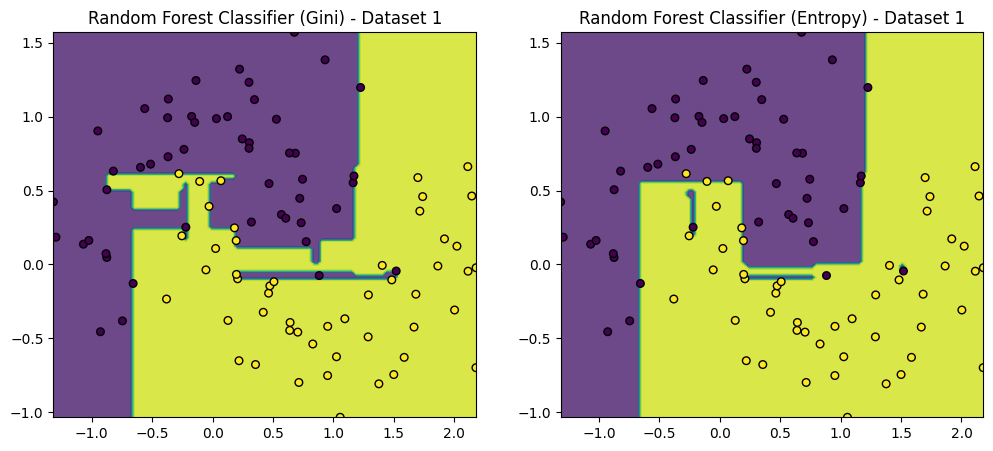

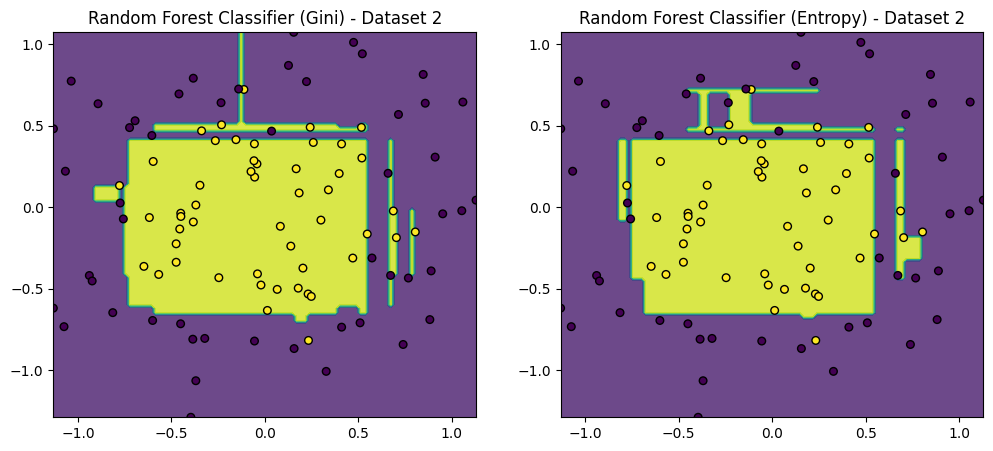

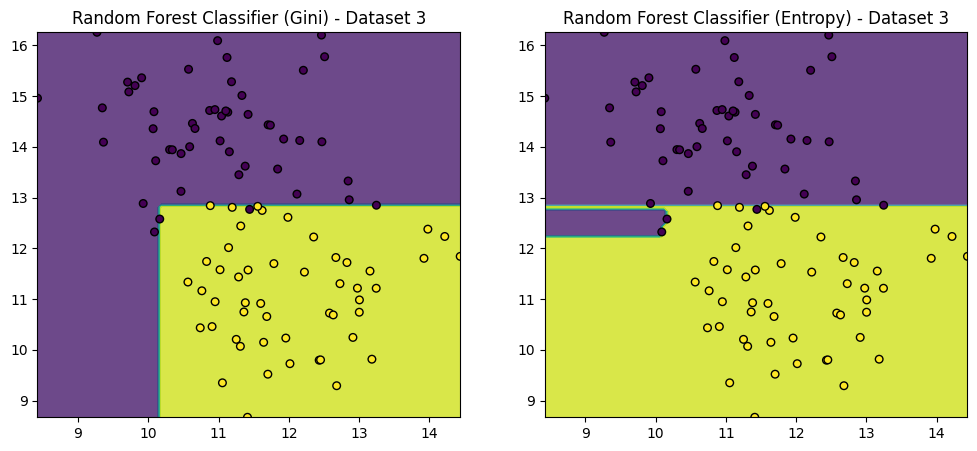

In [ ]:
import pandas as pd
import numpy as np
import random

class RandomForest:
    def __init__(self, n_estimators, criterion="gini"):
        if criterion not in ["gini", "entropy"]:
            raise ValueError("Criterion must be 'gini' or 'entropy'")
        self.n_estimators = n_estimators
        self.criterion = criterion
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            # Create a bootstrap sample with replacement
            n_samples = X.shape[0]
            sample_indices = [random.randint(0, n_samples - 1) for _ in range(n_samples)]
            X_sample = X.iloc[sample_indices]
            y_sample = y.iloc[sample_indices]

            # Create a decision tree and fit it to the sample
            tree = DecisionTree(criterion=self.criterion)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        predictions = [tree.predict(X) for tree in self.trees]
        # Perform majority voting for classification
        # If regression, you can return the mean of predictions
        return pd.DataFrame(predictions).mode(axis=0).iloc[0]

# Now, let's use the RandomForest class to fit and visualize the decision boundaries

# Create datasets
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 20), random_state=0)
]

# Fit and visualize the decision boundaries using the RandomForest
for idx, dataset in enumerate(datasets):
    X, y = dataset
    X = pd.DataFrame(X, columns=['feature1', 'feature2'])
    y = pd.Series(y)

    # Create a RandomForest with 10 trees and Gini criterion
    rf_gini = RandomForest(n_estimators=10, criterion="gini")
    rf_gini.fit(X, y)
    y_pred_gini = rf_gini.predict(X)

    # Create a RandomForest with 10 trees and Entropy criterion
    rf_entropy = RandomForest(n_estimators=10, criterion="entropy")
    rf_entropy.fit(X, y)
    y_pred_entropy = rf_entropy.predict(X)

    # Plot decision boundaries and color points based on predictions
    plt.figure(figsize=(12, 5))

    # Plot RandomForest (Gini)
    plt.subplot(1, 2, 1)
    plt.title(f'Random Forest Classifier (Gini) - Dataset {idx + 1}')
    xx, yy = np.meshgrid(np.linspace(X['feature1'].min(), X['feature1'].max(), 100),
                         np.linspace(X['feature2'].min(), X['feature2'].max(), 100))
    Z = rf_gini.predict(pd.DataFrame({'feature1': xx.ravel(), 'feature2': yy.ravel()})).values.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    plt.scatter(X['feature1'], X['feature2'], c=y, cmap='viridis', edgecolor='k', s=30)

    # Plot RandomForest (Entropy)
    plt.subplot(1, 2, 2)
    plt.title(f'Random Forest Classifier (Entropy) - Dataset {idx + 1}')
    Z = rf_entropy.predict(pd.DataFrame({'feature1': xx.ravel(), 'feature2': yy.ravel()})).values.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    plt.scatter(X['feature1'], X['feature2'], c=y, cmap='viridis', edgecolor='k', s=30)

    plt.show()


## SVM

In [262]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

class SVM:
    def __init__(self, kernel='linear', C=1.0):
        self.kernel = kernel
        self.C = C
        self.alpha = None
        self.w = None
        self.b = None
        self.y = None
        self.X = None
        self.gamma = None
        
    def rbf_kernel(self, X1, X2, gamma=1.0):        
        sq_dists = cdist(X1, X2, 'sqeuclidean')
        K = np.exp(-self.gamma * sq_dists)
        return K

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize optimization variables
        self.alpha = cp.Variable(n_samples)
        self.w = cp.Variable(n_features)
        self.b = cp.Variable()

        # lagrange contraints
        constraints = [self.alpha >= 0, self.alpha <= self.C, cp.sum(cp.multiply(self.alpha, y)) == 0]

        #linear == solving a quadratic problem where the objective is to maximize the margin between the classes subject to some constraints. 
        # 'rbf'== solving a similar problem but in a transformed feature space.

        if self.kernel == 'linear':
            objective = cp.Maximize(cp.sum(self.alpha) - 0.5 * cp.quad_form(cp.multiply(self.alpha, y), X @ X.T, assume_PSD=True))
        elif self.kernel == 'rbf':
            self.gamma = 1.0 / (2 * np.var(X))
            K = self.rbf_kernel(X, X)
            objective = cp.Maximize(cp.sum(self.alpha) - 0.5 * cp.quad_form(cp.multiply(self.alpha, y), K, assume_PSD=True))

        problem = cp.Problem(objective, constraints)
        problem.solve()

        if problem.status not in ["infeasible", "unbounded"]:
            # Problem has an optimal solution
            self.alpha = np.array(self.alpha.value)
            if self.kernel == 'linear':
                self.w = np.array(y * self.alpha).T @ X
                self.b = y[0] - X[0] @ self.w
            elif self.kernel == 'rbf':
                self.b = y[0] - np.sum(self.alpha * y * K[:, 0])
        else:
            # Problem does not have an optimal solution
            print("Problem is infeasible or unbounded for this kernel : .",self.kernel)
            print(self.b)
            print(self.alpha)
            print(self.y)
            
            return

        # Store training data and labels
        self.X = np.array(X)
        self.y = y

    def predict(self, X):
        if self.kernel == 'linear':
            return np.sign(X @ self.w + self.b)
        elif self.kernel == 'rbf':
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                y_predict[i] = np.sum(self.alpha * self.y * self.rbf_kernel(X[i].reshape(1, -1), self.X)) + self.b
            return np.sign(y_predict)




In [268]:
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_blobs
import matplotlib.pyplot as plt 

# Function to plot decision boundaries and color points based on predictions
def plot_decision_boundary(X, y, svm, title):
    plt.figure(figsize=(8, 6))

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

    # Plot decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
    xy = np.c_[xx.ravel(), yy.ravel()]

    # Get decision boundary
    Z = svm.predict(xy)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margin
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.9, linestyles=['--', '-', '--'])

    # Get indices of support vectors
    sv_indices = svm.alpha > 1e-5 # Slightly smaller than 0

    # Get support vectors
    support_vectors = svm.X[sv_indices]

    # Plot support vectors
    plt.scatter(support_vectors[:2, 0], support_vectors[:2, 1], s=500, facecolors='none', edgecolors='k', marker='X')

    plt.title(title)
    plt.show()

# Create datasets
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 20), random_state=0)
]


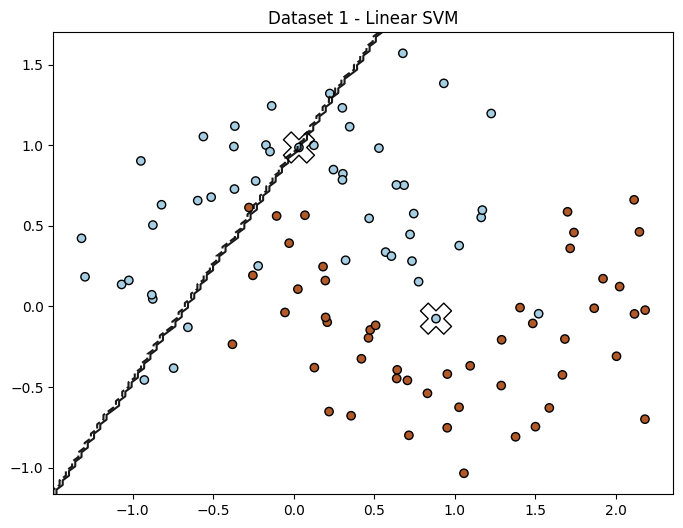

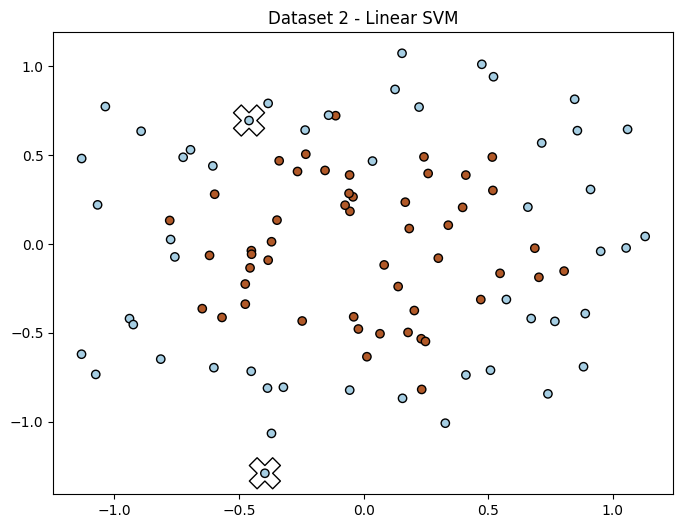

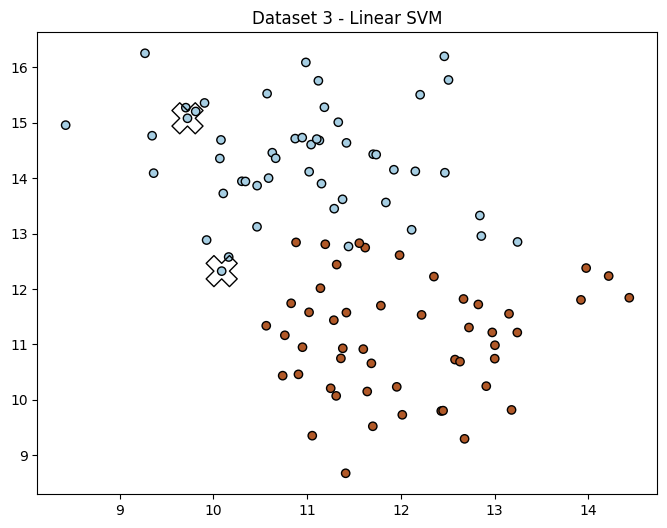

In [269]:
# Iterate over datasets
for i, (X, y) in enumerate(datasets, 1):
    # Create and fit SVM model
    svm_linear = SVM(kernel='linear', C=0.025)
    svm_linear.fit(X, y)
    # Plot decision boundaries for both linear and RBF SVM
    plot_decision_boundary(X, y, svm_linear, f'Dataset {i} - Linear SVM')


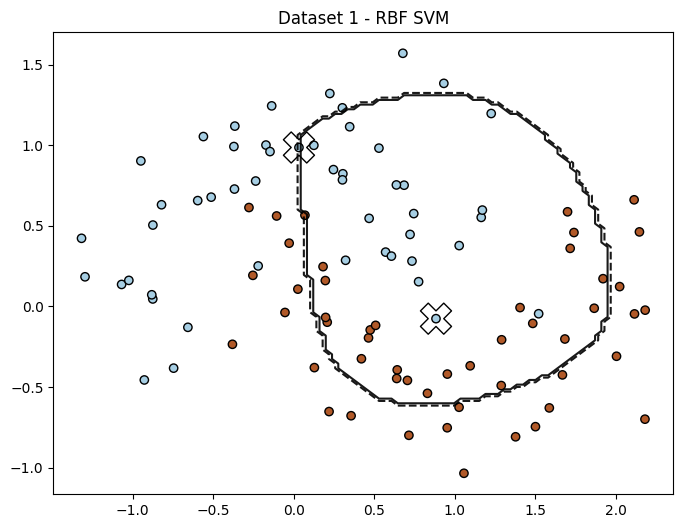

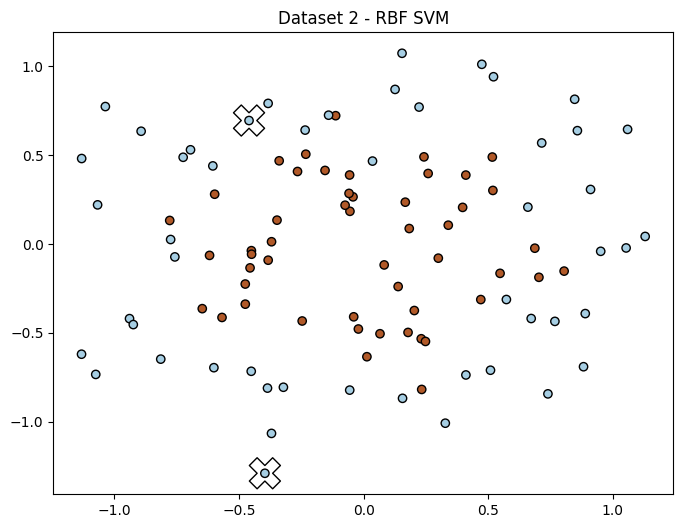

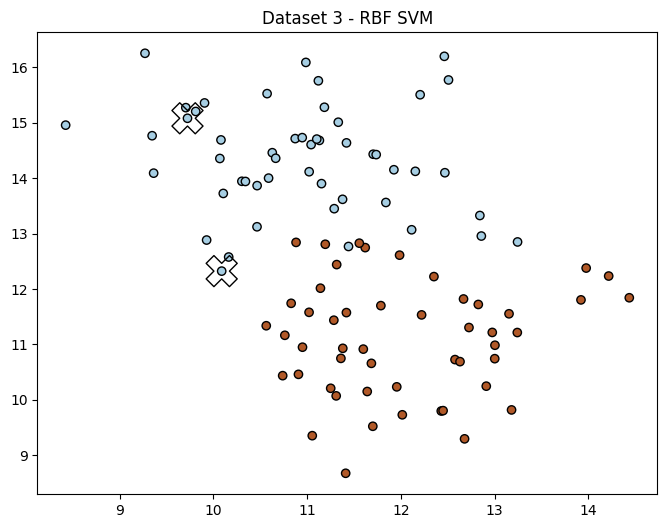

In [270]:
# Iterate over datasets
for i, (X, y) in enumerate(datasets, 1):
    # Create and fit SVM model
    svm_rbf = SVM(kernel='rbf', C=0.025)
    svm_rbf.fit(X, y)

    # Plot decision boundaries for both linear and RBF SVM
    plot_decision_boundary(X, y, svm_rbf, f'Dataset {i} - RBF SVM')

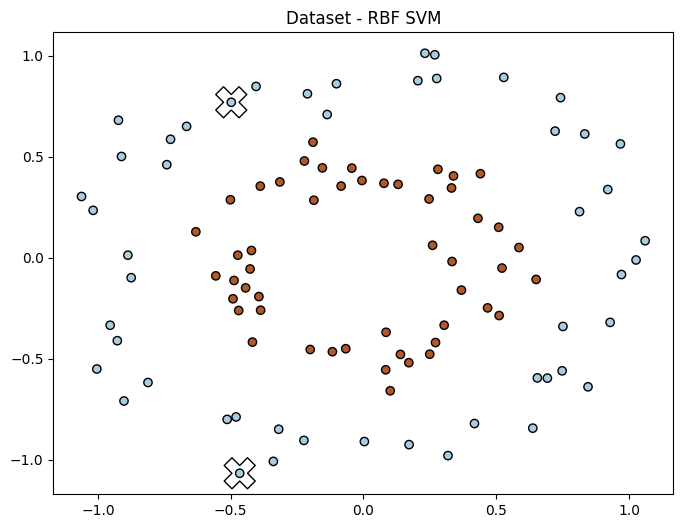

In [272]:
from sklearn.datasets import make_circles

# Generate synthetic data
X, y = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=1)

# Create and fit SVM model
svm_rbf = SVM(kernel='rbf', C=0.1)
svm_rbf.fit(X, y)

# Plot decision boundaries
plot_decision_boundary(X, y, svm_rbf, 'Dataset - RBF SVM')


In [ ]:
## maintenant on essaye avec C = np.inf,
'''After many tries, j'en conclue que ce n'est juste pas possible de
resoudre le probleme d'optimization avec C = inf car cela voudrais dire 
que nous n'avons pas du tout le droit au mauvaises classification, ce qui
est impossible dans notre cas avec nos donnees'''